In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
import matplotlib.pyplot as plt
import random

# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/FINAL_UHCS_DATASET/FINAL_AUGUMENTED_DATASET-/Train',
    target_size=(300, 300),
    batch_size=30,
    class_mode='categorical'
)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1/255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/FINAL_UHCS_DATASET/FINAL_AUGUMENTED_DATASET-/Test',
    target_size=(300, 300),
    batch_size=10,
    class_mode='categorical'
)


Found 788 images belonging to 3 classes.
Found 134 images belonging to 3 classes.


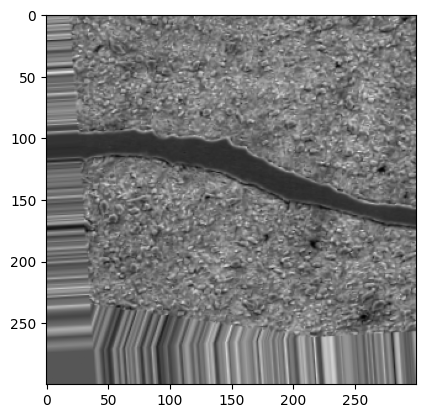

In [ ]:
batch = next(training_set)

# Select a random index within the batch
idx = random.randint(0, batch[0].shape[0] - 1)

# Display the image
plt.imshow(batch[0][idx])
plt.show()

In [ ]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
training_set.image_shape

(300, 300, 3)

In [ ]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=[300, 300, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# # Add another convolutional layer
# cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

# # Add another convolutional layer
# cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile( loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, epochs = 25, validation_data = test_set)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 153s 36s/step - accuracy: 0.3722 - loss: 59.9975 - val_accuracy: 0.3209 - val_loss: 88.9879
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.3486 - loss: 96.2057 - val_accuracy: 0.3209 - val_loss: 107.0351
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.3444 - loss: 86.8495 - val_accuracy: 0.3209 - val_loss: 55.7116
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.2302 - loss: 52.3520 - val_accuracy: 0.3358 - val_loss: 7.5039
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.2542 - loss: 16.3970 - val_accuracy: 0.3582 - val_loss: 20.6461
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.4167 - loss: 15.1384 - val_accuracy: 0.3209 - val_loss: 9.7253
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.3764 - loss: 6.6541 - val_accuracy: 0.4403 - val_loss: 3.7740
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3583 - loss: 5.4398 - val_accuracy: 0.3806 - val_loss: 2.0197
Epoch 9

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 982ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3209 - val_loss: 5.9470
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.2236 - loss: 4.9449 - val_accuracy: 0.3881 - val_loss: 1.9485
Epoch 12/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.2801 - loss: 2.8042 - val_accuracy: 0.4776 - val_loss: 2.9320
Epoch 13/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 7s/step - accuracy: 0.2944 - loss: 3.1249 - val_accuracy: 0.4328 - val_loss: 2.2071
Epoch 14/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.4639 - loss: 1.5905 - val_accuracy: 0.5373 - val_loss: 2.9454
Epoch 15/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.6653 - loss: 1.3146 - val_accuracy: 0.4776 - val_loss: 1.7767
Epoch 16/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4889 - loss: 1.4294 - val_accuracy: 0.5000 - val_loss: 1.3769
Epoch 17/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6167 - loss: 1.4419 - val_accuracy: 0.5299 - val_loss: 1.2392
Ep

In [ ]:
cnn.save('model.h5')

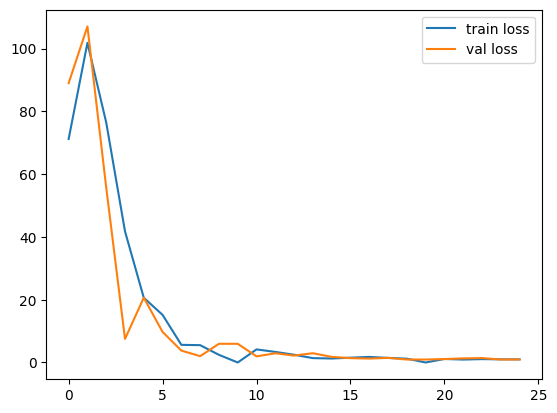

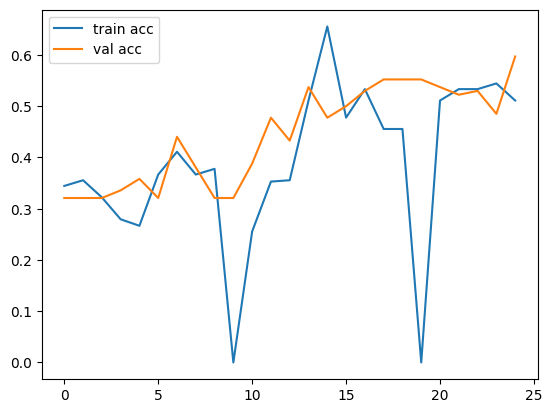

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_pred=cnn.predict(training_set)
y_pred=np.argmax(Y_pred, axis=1)

print(classification_report(training_set.classes , y_pred))

27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step
              precision    recall  f1-score   support

           0       0.33      0.39      0.36       269
           1       0.28      0.18      0.22       237
           2       0.38      0.42      0.40       282

    accuracy                           0.34       788
   macro avg       0.33      0.33      0.33       788
weighted avg       0.33      0.34      0.33       788



Normalized confusion matrix


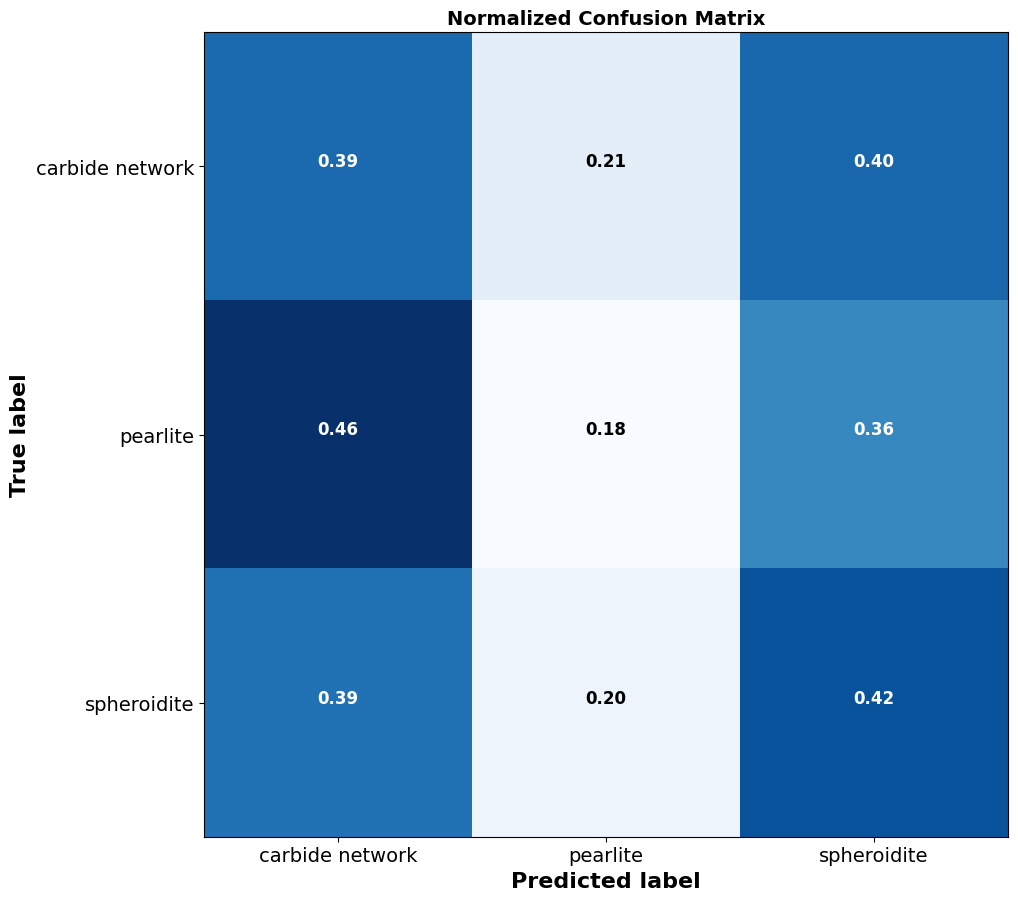

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/ cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix , without normalization")

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title , weight='bold', fontsize=14)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,fontsize=14)
  plt.yticks(tick_marks,classes,fontsize=14)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center", fontsize=12, weight='bold',
                    color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label',fontsize=16,weight='bold')
  plt.xlabel('Predicted label',fontsize=16,weight='bold')

    #compute confusion matrix

cnf_matrix=confusion_matrix(training_set.classes,y_pred)

np.set_printoptions(precision=2)

#plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix,classes=['carbide network','pearlite','spheroidite'],normalize=True,title='Normalized Confusion Matrix')
plt.show()




In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/FINAL_UHCS_DATASET/FINAL_AUGUMENTED_DATASET-/Test/Pearlite/pearlite_0_442.png', target_size = (300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn.predict(test_image)

# Get the class indices
class_indices = training_set.class_indices

# Convert the predictions to class labels
predicted_class = list(class_indices.keys())[np.argmax(predictions)]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: Pearlite


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/FINAL_UHCS_DATASET/FINAL_AUGUMENTED_DATASET-/Test/Spheroidite/spheroidite_0_362.png', target_size = (300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn.predict(test_image)

# Get the class indices
class_indices = training_set.class_indices

# Convert the predictions to class labels
predicted_class = list(class_indices.keys())[np.argmax(predictions)]

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Pearlite


In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/FINAL_UHCS_DATASET/FINAL_AUGUMENTED_DATASET-/Test/Carbide Network/network_0_323.png', target_size = (300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn.predict(test_image)

# Get the class indices
class_indices = training_set.class_indices

# Convert the predictions to class labels
predicted_class = list(class_indices.keys())[np.argmax(predictions)]

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: Pearlite


In [ ]:
pip install flask tensorflow

In [ ]:
!pip install flask-ngrok
!pip install pyngrok
!pip install tensorflow


In [ ]:
from flask import Flask, request, jsonify, render_template_string, url_for
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from pyngrok import ngrok
import io

# Set up ngrok authentication
authtoken = "2gpjToAyUEa5TYynSsjqeeFTRAh_5f9jNbHf1w21epYLb25wC"
ngrok.set_auth_token(authtoken)

# Initialize the Flask app
app = Flask(__name__)

# Load your trained model
model = tf.keras.models.load_model('model.h5')

# Define the class indices
class_indices = {'carbide network': 0, 'pearlite': 1, 'spheroidite': 2}
class_names = list(class_indices.keys())

# HTML template as a string
html_template = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Microstructure Classification</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-image: url('{{ url_for('static', filename='photoback.jpg') }}');
            background-size: cover;
            background-position: center;
            margin: 0;
            padding: 0;
            position: relative; /* Ensure positioning context for absolute elements */
        }
        .logo {
            position: absolute;
            top: 20px;
            left: 20px;
            width: 200px; /* Adjust the size as needed */
        }
        .background-text {
            position: absolute;
            top: 20px;
            right: 20px;
            color: white;
            font-size: 20px; /* Adjust the size as needed */
        }
        .container {
            background: rgba(255, 255, 255, 0.8);
            padding: 20px;
            margin: 100px auto;
            width: 400px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        .container h1 {
            text-align: center;
        }
        .container input[type="file"] {
            display: block;
            margin: 10px auto;
        }
        .container input[type="submit"] {
            display: block;
            margin: 10px auto;
            padding: 10px 20px;
            background: #4CAF50;
            color: white;
            border: none;
            border-radius: 5px;
            cursor: pointer;
        }
        .container input[type="submit"]:hover {
            background: #45a049;
        }
        .result {
            text-align: center;
            font-size: 1.2em;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <img src="{{ url_for('static', filename='mitlogo.png') }}" alt="College Logo" class="logo">
    <div class="background-text">Guide Name : Prof.Dr.Nitin Pagar </div>
    <div class="container">
        <h1>Microstructure Classification</h1>
        <form action="{{ url_for('predict') }}" method="post" enctype="multipart/form-data">
            <input type="file" name="file" required>
            <input type="submit" value="Predict">
        </form>
        {% if prediction %}
            <div class="result">
                <strong>Predicted Class:</strong> {{ prediction }}
            </div>
        {% endif %}
    </div>
</body>
</html>

'''

@app.route('/')
def upload_file():
    return render_template_string(html_template)

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file part'})

    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No selected file'})

    # Read the image file into a format suitable for load_img
    img_bytes = file.read()
    img = image.load_img(io.BytesIO(img_bytes), target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    return jsonify({'class': predicted_class})


In [ ]:
if __name__ == '__main__':
    # Set up ngrok tunnel
    public_url = ngrok.connect(5000)
    print('Public URL:', public_url)

    app.run()


Public URL: NgrokTunnel: "https://0bce-34-125-3-118.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [13/Nov/2024 12:40:52] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2024 12:40:53] "GET /static/photoback.jpg HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2024 12:40:53] "GET /static/mitlogo.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [13/Nov/2024 12:40:53] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


INFO:werkzeug:127.0.0.1 - - [13/Nov/2024 12:41:04] "POST /predict HTTP/1.1" 200 -
